<a href="https://colab.research.google.com/github/jpabonl/Proyecto-experimental/blob/main/Graficas_Toma_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Librerias
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import os

Limpieza de datos


In [19]:
file_path = './Muestras/XrayHV80kV-1uA--CG50-FG10--WS2-850nm--LiveTime300s--ConBloques.Spe'
data = np.loadtxt(file_path, skiprows=12)  # Se omite la primera fila que suele ser un encabezado


txt_file_path = './Muestras/XrayHV80kV-1uA--CG50-FG10--WS2-850nm--LiveTime300s--ConBloques.txt'
np.savetxt(txt_file_path, data, fmt='%f', delimiter='\t')

Graficas

In [39]:
Pos1Ref1 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos1-Ref-1Filtro--LiveTime300s--ConBloques.txt")
Pos3WS2 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos3-WS2-450nm--LiveTime300s--ConBloques.txt")
Pos6WS2 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos6-WS2-500nm--LiveTime300s--ConBloques.txt")
Pos7WS2 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos7-WS2-400nm--LiveTime300s--ConBloques.txt")
WS21000 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--WS2-1000nm--LiveTime300s--ConBloques.txt")
WS2850 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--WS2-850nm--LiveTime300s--ConBloques.txt")

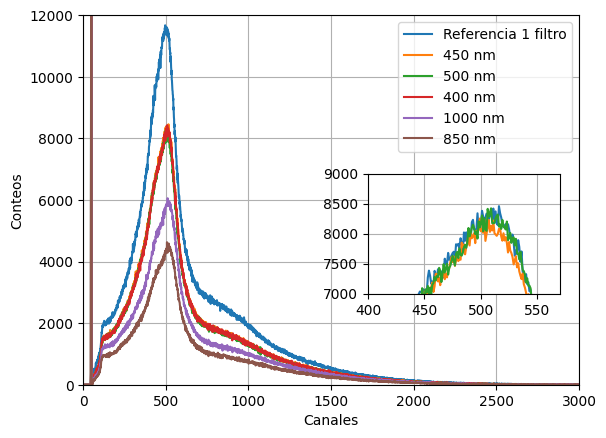

In [43]:
plt.plot(Pos1Ref1, label='Referencia 1 filtro')
plt.plot(Pos3WS2, label='450 nm')
plt.plot(Pos6WS2, label='500 nm')
plt.plot(Pos7WS2, label='400 nm')
plt.plot(WS21000, label='1000 nm')
plt.plot(WS2850, label='850 nm')
plt.ylim(0,12000)
plt.xlim(0,3000)
plt.ylabel('Conteos')
plt.xlabel('Canales')
plt.grid(True)
plt.legend()
# Definir los límites para el zoom-in
xmin = 400
xmax = 570
ymin = 7000
ymax = 9000

# Crear un área para el zoom-in en la esquina derecha
zoom_ax = plt.axes([0.57, 0.3, 0.3, 0.25])  # [left, bottom, width, height]
zoom_ax.plot(Pos3WS2, label="450nm")
zoom_ax.plot(Pos6WS2, label="500nm")
zoom_ax.plot(Pos7WS2, label="400nm")
zoom_ax.set_ylim(ymin, ymax)
zoom_ax.set_xlim(xmin, xmax)

zoom_ax.grid()

# Mostrar la leyenda en la gráfica principal
plt.grid(True)
plt.show()